开发并总结一个模型，根据难度对解决方案单词进行分类。识别与每个分类相关的给定单词的属性。使用你的模型，EERIE这个词有多难？讨论分类模型的准确性。  
从问题来看，只需要考虑单词，不用考虑日期了，那么根据前面的单词的属性，建立属性与次数的回归模型，然后根据分布于次数进行加权得出加权平均次数

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import nltk
from sklearn.cross_decomposition import PLSRegression

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

In [2]:
df = pd.read_excel('第一题表.xlsx', index_col=0)
y_columns = list(df.columns[5:12])
X_columns = ['word_len', 'DT', 'JJ', 'JJR', 'MD', 'NN', 'NNS', 'PRP$', 'RB', 'VB', 'VBG', 'VBN', '频数']
df=df[X_columns+y_columns]
df.to_excel('问题三-单词相关属性表.xlsx')
df.head()

word_len     DT     JJ    JJR     MD    NN    NNS   PRP$     RB     VB  \
0         5  False  False  False  False  True  False  False  False  False   
1         5  False  False  False  False  True  False  False  False  False   
2         4  False  False  False  False  True  False  False  False  False   
3         5  False  False  False  False  True  False  False  False  False   
4         5  False  False  False  False  True  False  False  False  False   

     VBG    VBN   频数     1 try   2 tries    3 tries    4 tries    5 tries  \
0  False  False  382  1.000000  3.000000  23.000000  39.000000  24.000000   
1  False  False  487  1.000000  5.000000  23.000000  31.000000  24.000000   
2  False  False  553  1.000000  3.000000  13.000000  27.000000  30.000000   
3  False  False  448  1.000000  4.000000  16.000000  30.000000  30.000000   
4  False  False  413  0.990099  8.910891  34.653465  33.663366  15.841584   

     6 tries  7 or more tries (X)  
0   9.000000             1.000000  
1  14.000000             2.000000  
2  22.000000             4.000000  
3  17.000000             2.000000  
4   4.950495             0.990099

In [3]:
X = df[X_columns].values
y = df[y_columns].values

In [4]:
pls = PLSRegression(n_components=1)
pls.fit(X, y)
pre_y = pls.predict(X)
mean_absolute_error(pre_y, y)

3.2899740480524455

In [5]:
#代码缺失处
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

n_componets       mae        mse
0             1  3.289974  22.377598
1             2  3.268723  22.123372
2             3  3.256402  22.004048
3             4  3.247289  21.976739
4             5  3.244544  21.958273
5             6  3.241326  21.954122
6             7  3.240172  21.950693
7             8  3.238512  21.948580
8             9  3.237912  21.948253
9            10  3.237540  21.948183
10           11  3.237522  21.948183
11           12  3.237498  21.948182

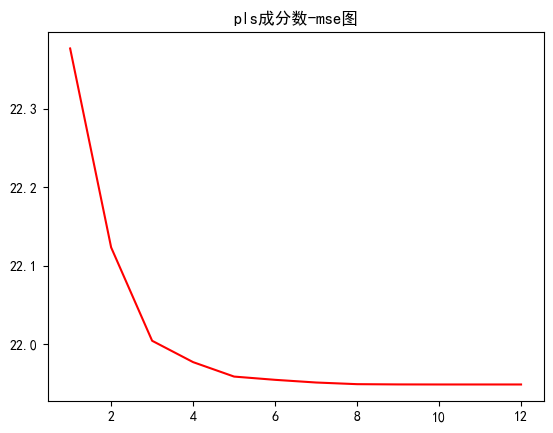

In [6]:
plt.plot(index, mae)
plt.title('pls成分数-mae图')
plt.savefig('第三题-pls成分数-mae图')
plt.show()
plt.plot(index, mse, c='r')
plt.title('pls成分数-mse图')
plt.savefig('第三题-pls成分数-mse图')
plt.show()

In [7]:
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码
代码缺失去处

mae        mse
0   3.289974  22.377598
1   3.268723  22.123372
2   3.256402  22.004048
3   3.247289  21.976739
4   3.244544  21.958273
5   3.241326  21.954122
6   3.240172  21.950693
7   3.238512  21.948580
8   3.237912  21.948253
9   3.237540  21.948183
10  3.237522  21.948183
11  3.237498  21.948182
12  3.457145  23.395814
13  3.464023  31.350995
14  3.482691  27.647784
15  2.996185  16.441811
16  3.071264  18.663299
17  3.617339  24.871194
18  3.526889  23.413991
19  3.028301  18.782752
20  3.523686  24.381903
21  3.470083  23.675087

In [8]:
word = 'eerie'
tag = nltk.pos_tag([word])
words = pd.read_excel('字母频数.xlsx', index_col=0)
频数 = 0
for i in word:
    频数+=words['频数'][i]
word_len = len(set(word))
predict_X = [False for i in X_columns]
predict_X[0]=word_len
predict_X[-1]=频数
predict_X=np.array(predict_X).reshape(1, -1)

pls = PLSRegression(n_components=4)
pls.fit(X, y)
pre_y = pls.predict(predict_X)
pre_y

# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

array([[ 0.36750077,  5.42104602, 18.93854993, 29.87142654, 26.43527133,
        14.86322213,  4.10298328]])

根据预测出来的分布，将其作为权重乘以尝试次数，即可得到加权后的平均尝试次数

In [9]:
index=np.array([i+1 for i in range(7)])

In [10]:
(index*pre_y[0]).sum()/100

4.375875211743068

所以我们认为'eerie'单词的平均猜测次数为4.3次，难度为4.3  
使用分类模型的话讲结果进行四舍五入即可。